# COMP3160: Assignment 1 (Specification Ver 2 -- updated: 2021-08-28)


For this assignment, you will use the Pima Indians diabetes dataset that comes originally from the National Institute of Diabetes. It uses real world medical data about female patients of Pima Indian heritage and contains information about whether these patients had an onset of diabetes within five years or not. It is a binary classification problem. The data is available as a single csv file and contains missing values ('0') in some columns. The assignment follows the workflow of a simple data science project and you will use a K-nearest neighbor classifier and then compare this classifier with three other classifiers.

The entire assignment is worth 20 marks and consists of 12 tasks. 

For each task, marks will be awarded for the output and for the quality of code (the code does what it should; follows a consistent style, and is easy to understand).

In [1]:
# 44434065 Runde Jia
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

random_state = 42

In [2]:
df = pd.read_csv('pima-indians-diabetes.csv')

In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## A. Pre-processing

**Task 1**: Replace all '0' in the data frame apart from those in the Pregnancies and Outcome columns by NaN, then display the head of the data frame and print out the number of missing values for each feature. [2 marks]

In [5]:
# Your code goes here.
cols = [i for i in df.columns if i not in["Pregnancies","Outcome"]]
df[cols] = df[cols].replace(['0', 0], np.nan)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50.0,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31.0,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32.0,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1


In [6]:
# Your code goes here.
print('Number of missing Values per Feature:')
df.isna().sum()

Number of missing Values per Feature:


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

**Task 2**: Import the [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) class from sklearn.impute, then use the mean as strategy to replace all NaNs, fit and transform the modfied data frame (using the fit_transform() function) and print again the number of missing values for each feature. [2 marks]

In [7]:
# Your code goes here.
from sklearn.impute import SimpleImputer
values = df.values
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
transform_val = imp_mean.fit_transform(values)
df = pd.DataFrame(transform_val, index=df.index,columns=df.columns)
print('Number of missing values per feature:')
df.isna().sum()

Number of missing values per feature:


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## B. Scaling

Distribution of values before scaling.

<AxesSubplot:>

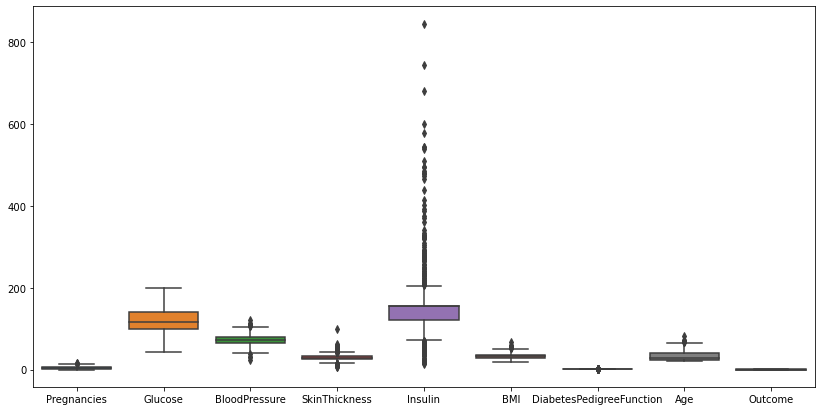

In [8]:
plt.figure(figsize = (14, 7))
sns.boxplot(data = df)

**Task 3:** Import the [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html?highlight=minmaxscaler#sklearn.preprocessing.MinMaxScaler) class from sklearn.preprocessing, fit and transform the data and plot the normalised data (using a seaborn boxplot) in order to display the distribution of values after scaling (as illustrated below). [2 marks]

<AxesSubplot:>

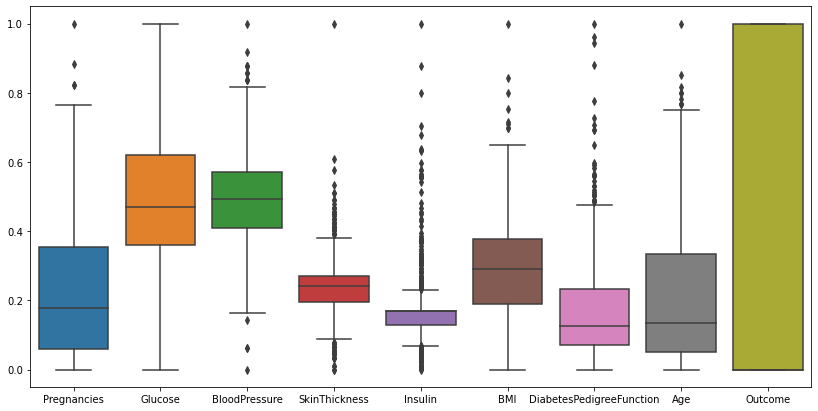

In [9]:
# Your code goes here.
from sklearn.preprocessing import MinMaxScaler
values = df.values
scaled_val = MinMaxScaler().fit_transform(values)
scaled_df = pd.DataFrame(scaled_val, index=df.index,columns=df.columns)
plt.figure(figsize = (14, 7))
sns.boxplot(data = scaled_df)

**Task 4**: Import the [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split) function from sklearn.model and split the data frame into a training set (X_train, y_train) and a test set (X_test, y_test), use 0.2 as test size and the previously defined random_state parameter (42). [1 mark]

In [10]:
# Your code goes here.
from sklearn.model_selection import train_test_split

all_X = scaled_df.iloc[:,:-1].values
all_y = scaled_df.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(
    all_X,all_y, test_size=0.20,random_state=42)

## C. Train and Evaluate the Model

**Task 5**: Import the [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) from sklearn.neighbors, set n_neighbors to 5, fit the model, make predications (using X_test) and report the accuracy of the classifier (using the [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html?highlight=classification_report#sklearn.metrics.classification_report) function from sklearn.metrics). [2 marks]

In [11]:
# Your code goes here.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

target_names = ['Outcome = 0', 'Outcome = 1']
neigh = KNeighborsClassifier(n_neighbors=5)
clf = neigh.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred, target_names=target_names))


              precision    recall  f1-score   support

 Outcome = 0       0.81      0.81      0.81        99
 Outcome = 1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



**Task 6:** Import the [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html?highlight=cross_val_score#sklearn.model_selection.cross_val_score) function from sklearn.model_selection, use 10-fold cross validation and report the accuracy of the classifier. Note for cross validation you don't use the train/test split. [2 marks]

In [12]:
# Your code goes here.
from sklearn.model_selection import cross_val_score

accuracy = cross_val_score(clf, all_X,all_y, cv=10)

print("Accuracy: %0.2f (+/- %0.2f)" % (accuracy.mean(), accuracy.std()*2))

Accuracy: 0.75 (+/- 0.11)


**Task 7**: Import the [cross_val_predict](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html?highlight=cross_val_predict#sklearn.model_selection.cross_val_predict) function from sklearn.model_selection and compute again precision, recall and F1-score for the classifier. The output will look similar to the output of Task 5. [2 marks]

In [13]:
# Your code goes here.
from sklearn.model_selection import cross_val_predict

y_pred1 = cross_val_predict(clf, all_X, all_y, cv=10)
print(classification_report(all_y, y_pred1, target_names=target_names))

              precision    recall  f1-score   support

 Outcome = 0       0.80      0.82      0.81       500
 Outcome = 1       0.65      0.62      0.64       268

    accuracy                           0.75       768
   macro avg       0.73      0.72      0.72       768
weighted avg       0.75      0.75      0.75       768



**Task 8**: Generate a confusion matrix using [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) and use a [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) from the seaborn library to display the number and percentage of true negatives, false positives, false negatives, and true positives (as illustrated below). [2 marks]

<AxesSubplot:>

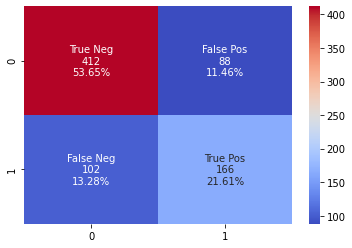

In [14]:
# Your code goes here.
from sklearn.metrics import confusion_matrix

confusionMatrix = confusion_matrix(all_y, y_pred1)

Labels1 = ['True Neg','False Pos','False Neg','True Pos']
Numbers = []
for number in confusionMatrix.flatten():
    Numbers.append(number)
eachPercentages = ["{0:0.2%}".format(percentage) 
                   for percentage in confusionMatrix.flatten() / np.sum(confusionMatrix)]
predictLables = (np.asarray([f"{label}\n{number}\n{percentage}" 
                          for label, number, percentage in zip(Labels1,Numbers,eachPercentages)])).reshape(2,2)

sns.heatmap(confusionMatrix, 
            annot = predictLables, 
            fmt = '', 
            cmap = 'coolwarm')

**Task 9**: Evaluate alternative values for K from 1 to 30 and plot the error rate versus the K-values (as illustrated below). [2 marks]

Text(0, 0.5, 'Error Rate')

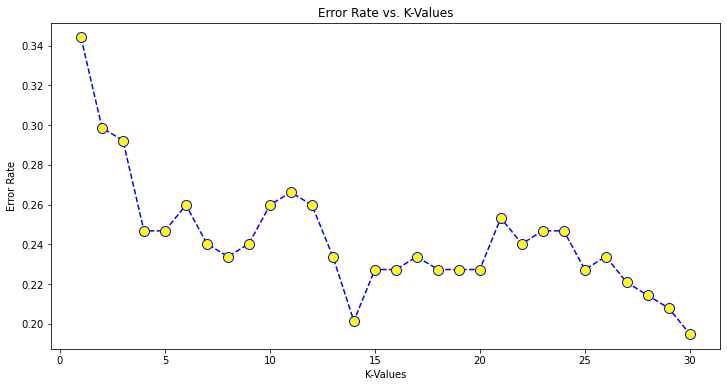

In [15]:
# Your code goes here.
error = []

for i in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(12, 6))
plt.plot(range(1, 31), error, color = 'blue', linestyle = 'dashed', marker = 'o',
         markerfacecolor = 'yellow', markersize = 10)
plt.title('Error Rate vs. K-Values')
plt.xlabel('K-Values')
plt.ylabel('Error Rate')

**Task 10:** Use the logistic regression classifier ([LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logisticregression#sklearn.linear_model.LogisticRegression), default setting), fit the model, make predictions, and report the results using a classification report. [1 mark]

In [16]:
# Your code goes here.
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)

print(classification_report(y_test,y_predict, target_names=target_names))


              precision    recall  f1-score   support

 Outcome = 0       0.80      0.88      0.84        99
 Outcome = 1       0.73      0.60      0.66        55

    accuracy                           0.78       154
   macro avg       0.77      0.74      0.75       154
weighted avg       0.78      0.78      0.77       154



**Task 11:** Use the support vector classifier ([SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html), default setting), fit the model, make predictions, and report the results using a classification report. [1 mark]

In [17]:
# Your code goes here.
from sklearn.svm import SVC

svc = SVC().fit(X_train,y_train)
y_predict = svc.predict(X_test)
print(classification_report(y_test,y_predict, target_names=target_names))

              precision    recall  f1-score   support

 Outcome = 0       0.79      0.86      0.82        99
 Outcome = 1       0.70      0.58      0.63        55

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.75       154



**Task 12:** Use the random forest classifier ([RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=randomforest), default setting), fit the model, make predictions, and report the results using a classification report. [1 mark]

In [18]:
# Your code goes here.
from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier(random_state=42)
clf2.fit(X_train, y_train)
y_predict = clf2.predict(X_test)
print(classification_report(y_test,y_predict, target_names=target_names))

              precision    recall  f1-score   support

 Outcome = 0       0.81      0.81      0.81        99
 Outcome = 1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

